# Ricommender Music Clustering Experiment

## Description
Music Clustering Experiment based on music_metadata csv file.

Part of IF4092 Tugas Akhir II project about Multicontext Music Recommender System

## Author
Ferdinandus Richard

## Import Required Modules

In [1]:
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

import math
import numpy as np
import pandas as pd

## Music Frame Experiment

### Load Music Frame CSV

Music frames metadata are loaded. Features used in this experiment are:
- `title`: title of the song
- `artist`: singer of the song
- `mean_thirteen_first_mfcc`: the mean value of thirteen first MFCC in the frame of the song
- `zcr`: zero crossing rate in the frame of the song
- `max_chroma`: maximum chromagram in the frame of the song

In [2]:
music_frame_dataframe = pd.read_csv('music_frame_metadata.csv', encoding='latin')
music_frame_dataframe

,id,mean_thirteen_first_mfcc,zcr,max_chroma
0,0,-35.777269,0.163086,5
1,0,-35.777269,0.316406,2
2,0,-35.777269,0.466797,2
3,0,-35.777269,0.612793,3
4,0,-35.777269,0.602051,3
5,0,-35.777269,0.596191,3
6,0,-35.777269,0.598633,3
7,0,-35.777269,0.598633,3
8,0,-35.777269,0.616211,3
9,0,-35.777269,0.635254,2


In [4]:
cleaned_music_frame_dataframe = music_frame_dataframe.drop('id', axis=1)
cleaned_music_frame_dataframe

,mean_thirteen_first_mfcc,zcr,max_chroma
0,-35.777269,0.163086,5
1,-35.777269,0.316406,2
2,-35.777269,0.466797,2
3,-35.777269,0.612793,3
4,-35.777269,0.602051,3
5,-35.777269,0.596191,3
6,-35.777269,0.598633,3
7,-35.777269,0.598633,3
8,-35.777269,0.616211,3
9,-35.777269,0.635254,2


In [5]:
encoded_max_chroma_dataframe = pd.get_dummies(cleaned_music_frame_dataframe['max_chroma'], prefix='max_chroma')
cleaned_music_frame_dataframe = pd.concat([cleaned_music_frame_dataframe, encoded_max_chroma_dataframe], axis=1)
cleaned_music_frame_dataframe = cleaned_music_frame_dataframe.drop('max_chroma', axis=1)
cleaned_music_frame_dataframe

,mean_thirteen_first_mfcc,zcr,max_chroma_0,max_chroma_1,max_chroma_2,max_chroma_3,max_chroma_4,max_chroma_5,max_chroma_6,max_chroma_7,max_chroma_8,max_chroma_9,max_chroma_10,max_chroma_11
0,-35.777269,0.163086,0,0,0,0,0,1,0,0,0,0,0,0
1,-35.777269,0.316406,0,0,1,0,0,0,0,0,0,0,0,0
2,-35.777269,0.466797,0,0,1,0,0,0,0,0,0,0,0,0
3,-35.777269,0.612793,0,0,0,1,0,0,0,0,0,0,0,0
4,-35.777269,0.602051,0,0,0,1,0,0,0,0,0,0,0,0
5,-35.777269,0.596191,0,0,0,1,0,0,0,0,0,0,0,0
6,-35.777269,0.598633,0,0,0,1,0,0,0,0,0,0,0,0
7,-35.777269,0.598633,0,0,0,1,0,0,0,0,0,0,0,0
8,-35.777269,0.616211,0,0,0,1,0,0,0,0,0,0,0,0
9,-35.777269,0.635254,0,0,1,0,0,0,0,0,0,0,0,0


In [6]:
print(np.amax(cleaned_music_frame_dataframe['mean_thirteen_first_mfcc']))
print(np.amin(cleaned_music_frame_dataframe['mean_thirteen_first_mfcc']))
print(np.amax(cleaned_music_frame_dataframe['zcr']))
print(np.amin(cleaned_music_frame_dataframe['zcr']))

22.8450905475
-46.5074901684
0.90185546875
0.0


In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaled_thirteen_first_mfcc = min_max_scaler.fit_transform(cleaned_music_frame_dataframe['mean_thirteen_first_mfcc'].values.reshape(-1, 1))
cleaned_music_frame_dataframe['mean_thirteen_first_mfcc'] = min_max_scaled_thirteen_first_mfcc
cleaned_music_frame_dataframe

,mean_thirteen_first_mfcc,zcr,max_chroma_0,max_chroma_1,max_chroma_2,max_chroma_3,max_chroma_4,max_chroma_5,max_chroma_6,max_chroma_7,max_chroma_8,max_chroma_9,max_chroma_10,max_chroma_11
0,0.154720,0.163086,0,0,0,0,0,1,0,0,0,0,0,0
1,0.154720,0.316406,0,0,1,0,0,0,0,0,0,0,0,0
2,0.154720,0.466797,0,0,1,0,0,0,0,0,0,0,0,0
3,0.154720,0.612793,0,0,0,1,0,0,0,0,0,0,0,0
4,0.154720,0.602051,0,0,0,1,0,0,0,0,0,0,0,0
5,0.154720,0.596191,0,0,0,1,0,0,0,0,0,0,0,0
6,0.154720,0.598633,0,0,0,1,0,0,0,0,0,0,0,0
7,0.154720,0.598633,0,0,0,1,0,0,0,0,0,0,0,0
8,0.154720,0.616211,0,0,0,1,0,0,0,0,0,0,0,0
9,0.154720,0.635254,0,0,1,0,0,0,0,0,0,0,0,0


### The Elbow Method

Metode siku (elbow) digunakan untuk menentukan jumlah cluster yang paling optimum dengan memetakan besar inersia untuk setiap jumlah cluster yang digunakan.

Jumlah cluster terbaik dipilih berdasarkan

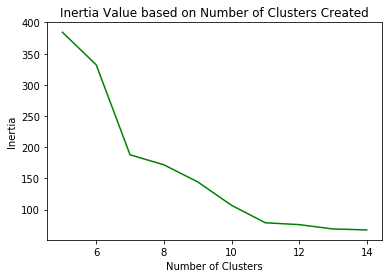

In [8]:
inertia_values = []

for n_cluster in range(5, 15):   
    music_frame_kmeans = MiniBatchKMeans(n_clusters=n_cluster, random_state=0, batch_size=1000)
    total_batches = math.ceil(len(cleaned_music_frame_dataframe)/1000)
    last_batch_index = total_batches-1
    for batch_index in range(total_batches):
        batch_first_index = 0 + batch_index * music_frame_kmeans.batch_size
        if (batch_index != last_batch_index):
            batch_last_index = music_frame_kmeans.batch_size + batch_index * music_frame_kmeans.batch_size
            music_frame_kmeans.partial_fit(cleaned_music_frame_dataframe[batch_first_index:batch_last_index])
        else:
            music_frame_kmeans.partial_fit(cleaned_music_frame_dataframe[batch_first_index:])
    inertia_values.append([n_cluster, music_frame_kmeans.inertia_])
        
inertia_values = np.array(inertia_values)

plt.figure()
plt.title('Inertia Value based on Number of Clusters Created')
plt.plot(inertia_values[:, 0], inertia_values[:, 1], color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa terdapat siku pada saat jumlah cluster yang diuji ada sebanyak **7 buah cluster**. Oleh karena itu, frame lagu akan dibagi menjadi **7 buah jenis frame** lagu.

In [9]:
n_cluster = 7
music_frame_kmeans = MiniBatchKMeans(n_clusters=n_cluster, random_state=0, batch_size=1000)
total_batches = math.ceil(len(cleaned_music_frame_dataframe)/1000)
last_batch_index = total_batches-1
for batch_index in range(total_batches):
    batch_first_index = 0 + batch_index * music_frame_kmeans.batch_size
    if (batch_index != last_batch_index):
        batch_last_index = music_frame_kmeans.batch_size + batch_index * music_frame_kmeans.batch_size
        music_frame_kmeans.partial_fit(cleaned_music_frame_dataframe[batch_first_index:batch_last_index])
    else:
        music_frame_kmeans.partial_fit(cleaned_music_frame_dataframe[batch_first_index:])
        
music_frame_kmeans.cluster_centers_

array([[  7.13326112e-01,   1.00545028e-01,   0.00000000e+00,
          9.49280501e-05,   9.99826896e-01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.23360118e-05,   0.00000000e+00,
          5.58400295e-06,   5.02560265e-05],
       [  7.00236402e-01,   9.27334611e-02,   9.99981628e-01,
          9.18615279e-06,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   4.59307640e-06,   0.00000000e+00,
          0.00000000e+00,   4.59307640e-06],
       [  7.26193704e-01,   9.11672894e-02,   0.00000000e+00,
          1.47500602e-05,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.47500602e-05,   9.99936083e-01,
          9.83337349e-06,   2.45834337e-05],
       [  7.12548333e-01,   9.52164394e-02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+0

In [10]:
music_frame_cluster_predictions = music_frame_kmeans.predict(cleaned_music_frame_dataframe)
music_frame_cluster_predictions

array([5, 0, 0, ..., 6, 5, 6])

In [11]:
music_frame_cluster_predictions_dataframe = pd.DataFrame(data=music_frame_cluster_predictions)
music_frame_cluster_predictions_dataframe.columns = ['frame_type']
clustered_music_frame_metadata = pd.concat([music_frame_dataframe, music_frame_cluster_predictions_dataframe], axis=1)
clustered_music_frame_metadata

,id,mean_thirteen_first_mfcc,zcr,max_chroma,frame_type
0,0,-35.777269,0.163086,5,5
1,0,-35.777269,0.316406,2,0
2,0,-35.777269,0.466797,2,0
3,0,-35.777269,0.612793,3,6
4,0,-35.777269,0.602051,3,6
5,0,-35.777269,0.596191,3,6
6,0,-35.777269,0.598633,3,6
7,0,-35.777269,0.598633,3,6
8,0,-35.777269,0.616211,3,6
9,0,-35.777269,0.635254,2,0


In [46]:
values = clustered_music_frame_metadata[clustered_music_frame_metadata['id'] == 0]['frame_type'].value_counts()
values

1    2106
6    1136
4    1077
3    1059
5     792
0     663
2     622
Name: frame_type, dtype: int64

## Music Experiment

### Load Music Metadata CSV

Load music metadata CSV based on music_metadata csv file. Features loaded are:
- `file`: file name of the song
- `title`: title of the song
- `artist`: singer of the song
- `album`: album of the song
- `mfcc`: mean of the overall mfcc values
- `zcr`: mean of zero crossing rate of the song
- `tempo`: music tempo
- `pitch`: pitch of the song
- `chroma`: mean of the chroma of the song

In [33]:
music_dataframe = pd.read_csv('music_metadata.csv', encoding='latin')
music_dataframe

,id,file,title,artist,album,mfcc,zcr,tempo,pitch,chroma,num_frames
0,0,G:\Code\TugasAkhir\ricommender\musics\5 Second...,Want You Back,5 Seconds of Summer,Youngblood,3.714279,0.113458,99.384014,0.02,0.423991,7455
1,1,G:\Code\TugasAkhir\ricommender\musics\5 Second...,Youngblood,"5 Seconds Of Summer, Luke Hemmings, Calum Hood...",Youngblood,2.604396,0.105390,117.453835,0.04,0.398548,8762
2,2,G:\Code\TugasAkhir\ricommender\musics\Adele - ...,Make You Feel My Love,Adele,19 (Deluxe Edition),-2.166559,0.051057,151.999081,0.02,0.299245,9132
3,3,G:\Code\TugasAkhir\ricommender\musics\Alan Wal...,All Falls Down (feat. Noah Cyrus & Digital Far...,Alan Walker,All Falls Down - Single,-3.486512,0.148028,129.199219,0.01,0.356382,8575
4,4,G:\Code\TugasAkhir\ricommender\musics\Alan Wal...,Alone,Alan Walker,Alone - Single,4.487372,0.109462,95.703125,-0.02,0.334470,6937
5,5,G:\Code\TugasAkhir\ricommender\musics\Alan Wal...,Tired (feat. Gavin James),Alan Walker,Tired (feat. Gavin James) - Single,3.471507,0.117655,123.046875,-0.01,0.386283,8275
6,6,G:\Code\TugasAkhir\ricommender\musics\Alessia ...,How Far I'll Go (Alessia Cara Version),Alessia Cara,Moana: Original Motion Picture Soundtrack,-1.703088,0.070486,123.046875,0.01,0.381406,7855
7,7,G:\Code\TugasAkhir\ricommender\musics\Alessia ...,Scars To Your Beautiful,Alessia Cara,Know-It-All,6.058626,0.096843,95.703125,0.00,0.366295,9918
8,8,G:\Code\TugasAkhir\ricommender\musics\Alesso_f...,Let Me Go (feat. Florida Georgia Line & Watt),Hailee Steinfeld & Alesso,Let Me Go - Single,4.722919,0.094320,103.359375,0.04,0.370252,7529
9,9,G:\Code\TugasAkhir\ricommender\musics\Alicia K...,If I Ain't Got You,Alicia Keys,The Diary of Alicia Keys,-0.528489,0.071205,117.453835,0.01,0.333439,9850


In [34]:
cleaned_music_dataframe = music_dataframe.drop('file', axis=1)
cleaned_music_dataframe = cleaned_music_dataframe.drop('title', axis=1)
cleaned_music_dataframe = cleaned_music_dataframe.drop('artist', axis=1)
cleaned_music_dataframe = cleaned_music_dataframe.drop('album', axis=1)
cleaned_music_dataframe

,id,mfcc,zcr,tempo,pitch,chroma,num_frames
0,0,3.714279,0.113458,99.384014,0.02,0.423991,7455
1,1,2.604396,0.105390,117.453835,0.04,0.398548,8762
2,2,-2.166559,0.051057,151.999081,0.02,0.299245,9132
3,3,-3.486512,0.148028,129.199219,0.01,0.356382,8575
4,4,4.487372,0.109462,95.703125,-0.02,0.334470,6937
5,5,3.471507,0.117655,123.046875,-0.01,0.386283,8275
6,6,-1.703088,0.070486,123.046875,0.01,0.381406,7855
7,7,6.058626,0.096843,95.703125,0.00,0.366295,9918
8,8,4.722919,0.094320,103.359375,0.04,0.370252,7529
9,9,-0.528489,0.071205,117.453835,0.01,0.333439,9850


In [35]:
music_kmeans = KMeans(n_clusters=5, random_state=0)
music_kmeans.fit(cleaned_music_dataframe)
music_kmeans.labels_

array([2, 0, 0, 0, 2, 2, 2, 3, 2, 3, 2, 3, 2, 0, 2, 2, 3, 0, 2, 0, 2, 2, 3,
       3, 0, 0, 2, 3, 0, 3, 0, 3, 0, 1, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 0, 2,
       2, 2, 2, 1, 3, 0, 3, 3, 0, 2, 2, 1, 1, 2, 2, 1, 3, 2, 2, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 3, 1, 2, 2, 1, 3, 3, 1, 3, 2, 2, 1, 0, 0, 0, 2, 2,
       2, 4, 1, 3, 1, 2, 2, 0, 3, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 3, 0, 3, 3, 3, 0, 1, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 2, 0, 3, 0,
       3, 3, 2, 2, 3, 2, 0, 0, 0, 3, 3, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 3,
       3, 2, 3, 0, 3, 2, 0, 3, 2, 2, 3, 0, 3, 3, 0, 0, 1, 0, 3, 1, 0, 2, 3,
       4, 0, 0, 2, 2, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 3, 2, 3, 1, 0, 0, 1, 0, 2, 3,
       2, 0])

## Combine Frame Types to Music Music Metadata

### Add New Columns

In [39]:
combined_music_dataframe = music_dataframe
for clst_idx in range(n_cluster):
    column_name = 'frame_' + str(clst_idx)
    combined_music_dataframe[column_name] =  0
combined_music_dataframe

,id,file,title,artist,album,mfcc,zcr,tempo,pitch,chroma,num_frames,frame_0,frame_1,frame_2,frame_3,frame_4,frame_5,frame_6
0,0,G:\Code\TugasAkhir\ricommender\musics\5 Second...,Want You Back,5 Seconds of Summer,Youngblood,3.714279,0.113458,99.384014,0.02,0.423991,7455,0,0,0,0,0,0,0
1,1,G:\Code\TugasAkhir\ricommender\musics\5 Second...,Youngblood,"5 Seconds Of Summer, Luke Hemmings, Calum Hood...",Youngblood,2.604396,0.105390,117.453835,0.04,0.398548,8762,0,0,0,0,0,0,0
2,2,G:\Code\TugasAkhir\ricommender\musics\Adele - ...,Make You Feel My Love,Adele,19 (Deluxe Edition),-2.166559,0.051057,151.999081,0.02,0.299245,9132,0,0,0,0,0,0,0
3,3,G:\Code\TugasAkhir\ricommender\musics\Alan Wal...,All Falls Down (feat. Noah Cyrus & Digital Far...,Alan Walker,All Falls Down - Single,-3.486512,0.148028,129.199219,0.01,0.356382,8575,0,0,0,0,0,0,0
4,4,G:\Code\TugasAkhir\ricommender\musics\Alan Wal...,Alone,Alan Walker,Alone - Single,4.487372,0.109462,95.703125,-0.02,0.334470,6937,0,0,0,0,0,0,0
5,5,G:\Code\TugasAkhir\ricommender\musics\Alan Wal...,Tired (feat. Gavin James),Alan Walker,Tired (feat. Gavin James) - Single,3.471507,0.117655,123.046875,-0.01,0.386283,8275,0,0,0,0,0,0,0
6,6,G:\Code\TugasAkhir\ricommender\musics\Alessia ...,How Far I'll Go (Alessia Cara Version),Alessia Cara,Moana: Original Motion Picture Soundtrack,-1.703088,0.070486,123.046875,0.01,0.381406,7855,0,0,0,0,0,0,0
7,7,G:\Code\TugasAkhir\ricommender\musics\Alessia ...,Scars To Your Beautiful,Alessia Cara,Know-It-All,6.058626,0.096843,95.703125,0.00,0.366295,9918,0,0,0,0,0,0,0
8,8,G:\Code\TugasAkhir\ricommender\musics\Alesso_f...,Let Me Go (feat. Florida Georgia Line & Watt),Hailee Steinfeld & Alesso,Let Me Go - Single,4.722919,0.094320,103.359375,0.04,0.370252,7529,0,0,0,0,0,0,0
9,9,G:\Code\TugasAkhir\ricommender\musics\Alicia K...,If I Ain't Got You,Alicia Keys,The Diary of Alicia Keys,-0.528489,0.071205,117.453835,0.01,0.333439,9850,0,0,0,0,0,0,0


### Count Music Frames

In [59]:
for id in combined_music_dataframe['id']:
    frame_count = clustered_music_frame_metadata[clustered_music_frame_metadata['id'] == id]['frame_type'].value_counts()
    for frm_clst_idx in range(n_cluster):
        column_name = 'frame_' + str(frm_clst_idx)
        combined_music_dataframe.at[id, column_name] = frame_count.loc[frm_clst_idx]
        
combined_music_dataframe

,id,file,title,artist,album,mfcc,zcr,tempo,pitch,chroma,num_frames,frame_0,frame_1,frame_2,frame_3,frame_4,frame_5,frame_6
0,0,G:\Code\TugasAkhir\ricommender\musics\5 Second...,Want You Back,5 Seconds of Summer,Youngblood,3.714279,0.113458,99.384014,0.02,0.423991,7455,663,2106,622,1059,1077,792,1136
1,1,G:\Code\TugasAkhir\ricommender\musics\5 Second...,Youngblood,"5 Seconds Of Summer, Luke Hemmings, Calum Hood...",Youngblood,2.604396,0.105390,117.453835,0.04,0.398548,8762,921,1272,778,197,1457,1833,2304
2,2,G:\Code\TugasAkhir\ricommender\musics\Adele - ...,Make You Feel My Love,Adele,19 (Deluxe Edition),-2.166559,0.051057,151.999081,0.02,0.299245,9132,804,603,810,263,293,1503,4856
3,3,G:\Code\TugasAkhir\ricommender\musics\Alan Wal...,All Falls Down (feat. Noah Cyrus & Digital Far...,Alan Walker,All Falls Down - Single,-3.486512,0.148028,129.199219,0.01,0.356382,8575,117,1011,104,114,121,1205,5903
4,4,G:\Code\TugasAkhir\ricommender\musics\Alan Wal...,Alone,Alan Walker,Alone - Single,4.487372,0.109462,95.703125,-0.02,0.334470,6937,1074,569,665,144,1166,1322,1997
5,5,G:\Code\TugasAkhir\ricommender\musics\Alan Wal...,Tired (feat. Gavin James),Alan Walker,Tired (feat. Gavin James) - Single,3.471507,0.117655,123.046875,-0.01,0.386283,8275,2056,154,1425,926,569,130,3015
6,6,G:\Code\TugasAkhir\ricommender\musics\Alessia ...,How Far I'll Go (Alessia Cara Version),Alessia Cara,Moana: Original Motion Picture Soundtrack,-1.703088,0.070486,123.046875,0.01,0.381406,7855,268,720,756,1407,339,444,3921
7,7,G:\Code\TugasAkhir\ricommender\musics\Alessia ...,Scars To Your Beautiful,Alessia Cara,Know-It-All,6.058626,0.096843,95.703125,0.00,0.366295,9918,612,534,2472,1967,1353,1444,1536
8,8,G:\Code\TugasAkhir\ricommender\musics\Alesso_f...,Let Me Go (feat. Florida Georgia Line & Watt),Hailee Steinfeld & Alesso,Let Me Go - Single,4.722919,0.094320,103.359375,0.04,0.370252,7529,207,1358,180,55,451,743,4535
9,9,G:\Code\TugasAkhir\ricommender\musics\Alicia K...,If I Ain't Got You,Alicia Keys,The Diary of Alicia Keys,-0.528489,0.071205,117.453835,0.01,0.333439,9850,841,766,1622,760,1591,202,4068


### Save Music Metadata to CSV

In [62]:
combined_music_dataframe.to_csv(r'full_music_metadata.csv', index=False)